<a href="https://colab.research.google.com/github/ashu017/Garbage-Classification/blob/master/GarbageClassificationMobileNetImageDataGenerator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount("/content/gdrive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import numpy as np
import pandas as pd
import os

In [0]:
print(os.listdir("gdrive/My Drive/Garbage classification/Garbage classification"))
print(os.listdir("gdrive/My Drive/Garbage classification/"))

['cardboard', 'plastic', 'trash', 'metal', 'glass', 'paper']
['Garbage classification']


In [0]:
import matplotlib.pyplot as plt

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, GlobalAveragePooling2D
from keras.optimizers import Adam, RMSprop
from keras.preprocessing.image import ImageDataGenerator

In [0]:
from keras.preprocessing import image

In [0]:
base_path = "gdrive/My Drive/Garbage classification/Garbage classification"
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.1
)

test_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1
)
train_generator = train_datagen.flow_from_directory(
    base_path,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical',
    subset='training',
    seed=0
)

validation_generator = test_datagen.flow_from_directory(
    base_path,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical',
    subset='validation',
    seed=0
)

In [0]:
IMG_SHAPE = (224,224,3)
from keras.applications.mobilenet_v2 import MobileNetV2
base_model = MobileNetV2(input_shape= IMG_SHAPE, include_top=False, weights='imagenet')

W0719 15:42:23.481741 140346278483840 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0719 15:42:23.538795 140346278483840 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0719 15:42:23.561079 140346278483840 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0719 15:42:23.608545 140346278483840 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0719 15:42:23.609898 1403462784

9412608/9406464 [==============================] - 1s 0us/step


In [0]:
base_model.trainable = False
base_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu

In [0]:
model = Sequential([
  base_model,
  GlobalAveragePooling2D(),
  Dense(6, activation='sigmoid')
])


In [0]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

W0702 19:21:45.263005 140679341361024 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0702 19:21:45.304054 140679341361024 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
batch_size = 64
epochs = 5
steps_per_epoch = train_generator.n // batch_size
validation_steps = validation_generator.n // batch_size

history = model.fit_generator(train_generator, 
                              steps_per_epoch = steps_per_epoch,
                              epochs=epochs, 
                              workers=4,
                              validation_data=validation_generator, 
                              validation_steps=validation_steps)

Epoch 1/5
35/35 [==============================] - 76s 2s/step - loss: 0.4651 - acc: 0.8119 - val_loss: 0.4164 - val_acc: 0.8160
Epoch 2/5
35/35 [==============================] - 66s 2s/step - loss: 0.3553 - acc: 0.8562 - val_loss: 0.3930 - val_acc: 0.8437
Epoch 3/5
35/35 [==============================] - 66s 2s/step - loss: 0.3119 - acc: 0.8744 - val_loss: 0.3049 - val_acc: 0.8958
Epoch 4/5
35/35 [==============================] - 66s 2s/step - loss: 0.2802 - acc: 0.8866 - val_loss: 0.3237 - val_acc: 0.8681
Epoch 5/5
35/35 [==============================] - 64s 2s/step - loss: 0.2770 - acc: 0.8932 - val_loss: 0.3513 - val_acc: 0.8646


[0.811904742036547, 0.8562499727521624, 0.8744047505514962, 0.8866071275302342, 0.8953771112609084]
[0.8159722089767456, 0.8437499602635702, 0.8958332935969034, 0.868055542310079, 0.8645833333333334]


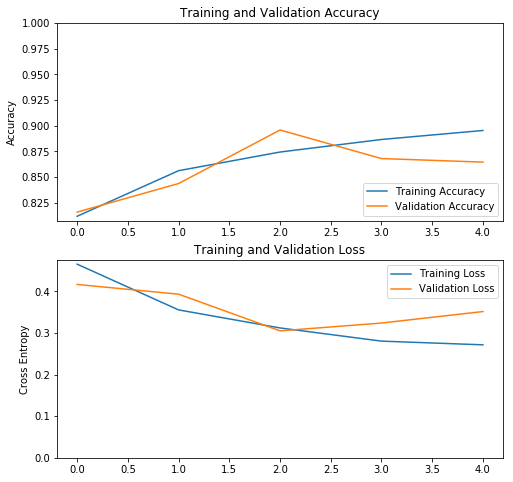

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
print(acc)
print(val_acc)

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Loss')
plt.show()

In [0]:
base_model.trainable = True
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False

Number of layers in the base model:  155


In [0]:
model.compile(loss='binary_crossentropy',
              optimizer = RMSprop(lr=2e-5),
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1280)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 7686      
Total params: 2,265,670
Trainable params: 1,870,278
Non-trainable params: 395,392
_________________________________________________________________


In [0]:
history_fine = model.fit_generator(train_generator, 
                                   steps_per_epoch = steps_per_epoch,
                                   epochs=epochs, 
                                   workers=4,
                                   validation_data=validation_generator, 
                                   validation_steps=validation_steps)

Epoch 1/5
35/35 [==============================] - 101s 3s/step - loss: 0.2521 - acc: 0.9006 - val_loss: 0.2568 - val_acc: 0.8889
Epoch 2/5
35/35 [==============================] - 93s 3s/step - loss: 0.2477 - acc: 0.9042 - val_loss: 0.2345 - val_acc: 0.9264
Epoch 3/5
35/35 [==============================] - 92s 3s/step - loss: 0.2387 - acc: 0.9039 - val_loss: 0.2628 - val_acc: 0.8993
Epoch 4/5
35/35 [==============================] - 93s 3s/step - loss: 0.2240 - acc: 0.9119 - val_loss: 0.2463 - val_acc: 0.8993
Epoch 5/5
35/35 [==============================] - 93s 3s/step - loss: 0.1990 - acc: 0.9241 - val_loss: 0.2056 - val_acc: 0.9097


In [0]:
acc = history_fine.history['acc']
val_acc = history_fine.history['val_acc']

loss = history_fine.history['loss']
val_loss = history_fine.history['val_loss']

In [0]:
print(acc)
print(val_acc)

[0.9005952273096357, 0.9041666541780744, 0.9054136193581741, 0.9119047522544861, 0.9241071326392037]
[0.8888888756434122, 0.9263565665067628, 0.899305542310079, 0.899305542310079, 0.9097222089767456]


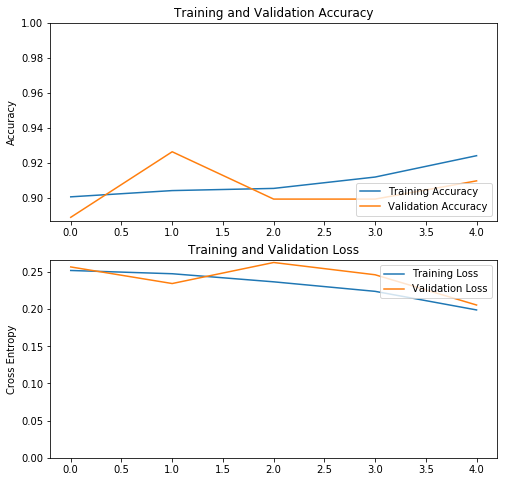

In [0]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Loss')
plt.show()

96


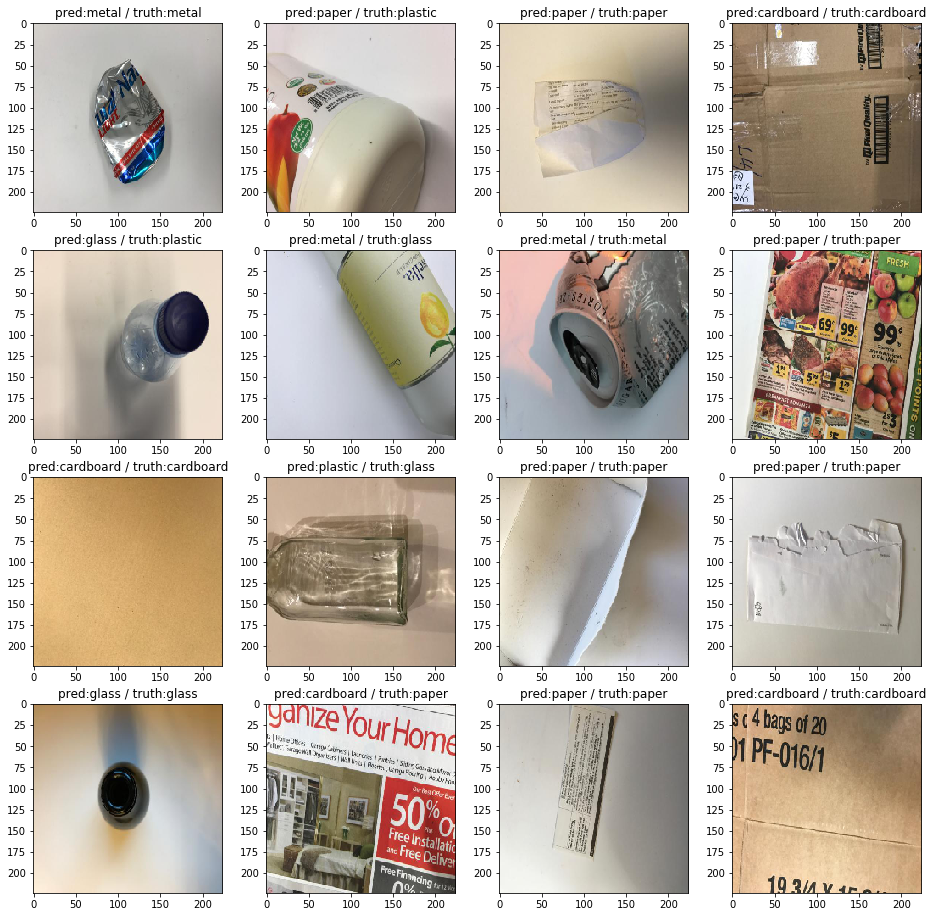

In [0]:
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
test_x, test_y = validation_generator.__getitem__(1)

preds = model.predict(test_x)
print(preds.size)
plt.figure(figsize=(16, 16))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.title('pred:%s / truth:%s' % (labels[np.argmax(preds[i])], labels[np.argmax(test_y[i])]))
    plt.imshow(test_x[i])

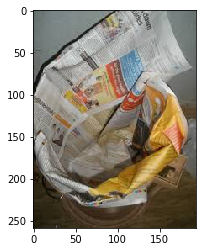

In [0]:
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
img = load_img("download.jpg")
plt.imshow(img)

96
biodegradable
biodegradable
biodegradable
biodegradable
biodegradable
biodegradable


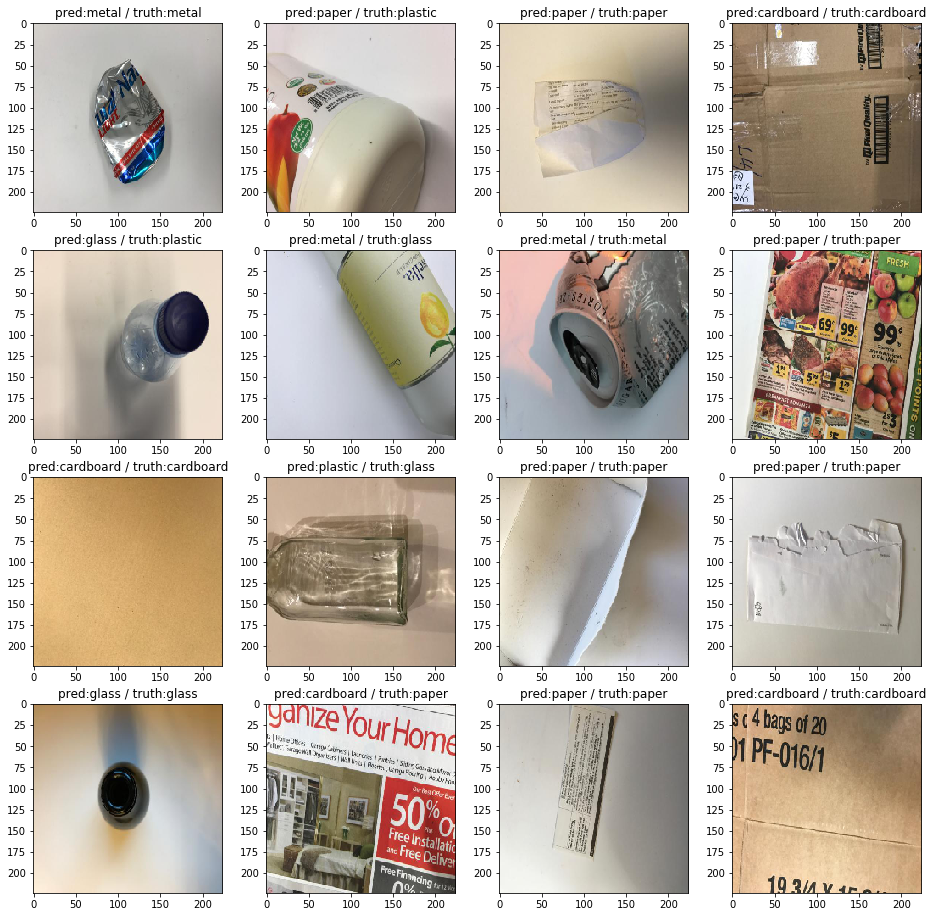

In [0]:
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
test_x, test_y = validation_generator.__getitem__(1)

preds = model.predict(test_x)
print(preds.size)
plt.figure(figsize=(16, 16))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.title('pred:%s / truth:%s' % (labels[np.argmax(preds[i])], labels[np.argmax(test_y[i])]))
    if labels[np.argmax(preds[i])]=="paper":
      print("biodegradable")
    plt.imshow(test_x[i])